# Machine Learning II Individual Asignment 1

In [119]:
import helper
import numpy as np
import pandas as pd
import seaborn as sns
from tempfile import mkdtemp
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score as metric_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

### Setting Key Values

The following values are used throught the code, this cell gives a central source where they can be managed

In [86]:
MEMORY = mkdtemp()

KEYS = {
    'SEED': 1,
    'DATA_PATH' : 'https://gist.githubusercontent.com/akoury/d5943d9c3dba8dc20a4c0c35027b110c/raw/8f01edb1ce950511cab5f9aa6aafd14bd2fe96db/Turnover',
    'TARGET': 'left',
    'METRIC': 'accuracy',
    'TIMESERIES': False,
    'SPLITS': 5,
    'ESTIMATORS': 3,
    'ITERATIONS': 500,
    'MEMORY': MEMORY
}

hp = helper.Helper(KEYS)

### Data Loading

Here we load the necessary data, print its first rows and describe its contents

In [75]:
def read_data(input_path):
    return pd.read_csv(input_path)

data = read_data(KEYS['DATA_PATH'])

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [76]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data types

We review the data types for each column

In [77]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project           int64  
average_montly_hours     int64  
time_spend_company       int64  
Work_accident            int64  
left                     int64  
promotion_last_5years    int64  
sales                    object 
salary                   object 
dtype: object

### Missing Data

We check if there is any missing data

In [78]:
hp.missing_data(data)

,Total,Percent
salary,0,0.0
sales,0,0.0
promotion_last_5years,0,0.0
left,0,0.0
Work_accident,0,0.0
time_spend_company,0,0.0
average_montly_hours,0,0.0
number_project,0,0.0
last_evaluation,0,0.0
satisfaction_level,0,0.0


### Converting columns to their true categorical type
Now we convert the data types of numerical columns that are actually categorical

In [79]:
data = hp.convert_to_category(data, data.iloc[:,5:8])

data.dtypes

satisfaction_level       float64 
last_evaluation          float64 
number_project           int64   
average_montly_hours     int64   
time_spend_company       int64   
Work_accident            category
left                     category
promotion_last_5years    category
sales                    object  
salary                   object  
dtype: object

In [80]:
train_data, holdout = train_test_split(data, test_size=0.2)

## Exploratory Data Analysis

Now we plot pairwise relationships as well as the distribution for each column in the diagonal

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


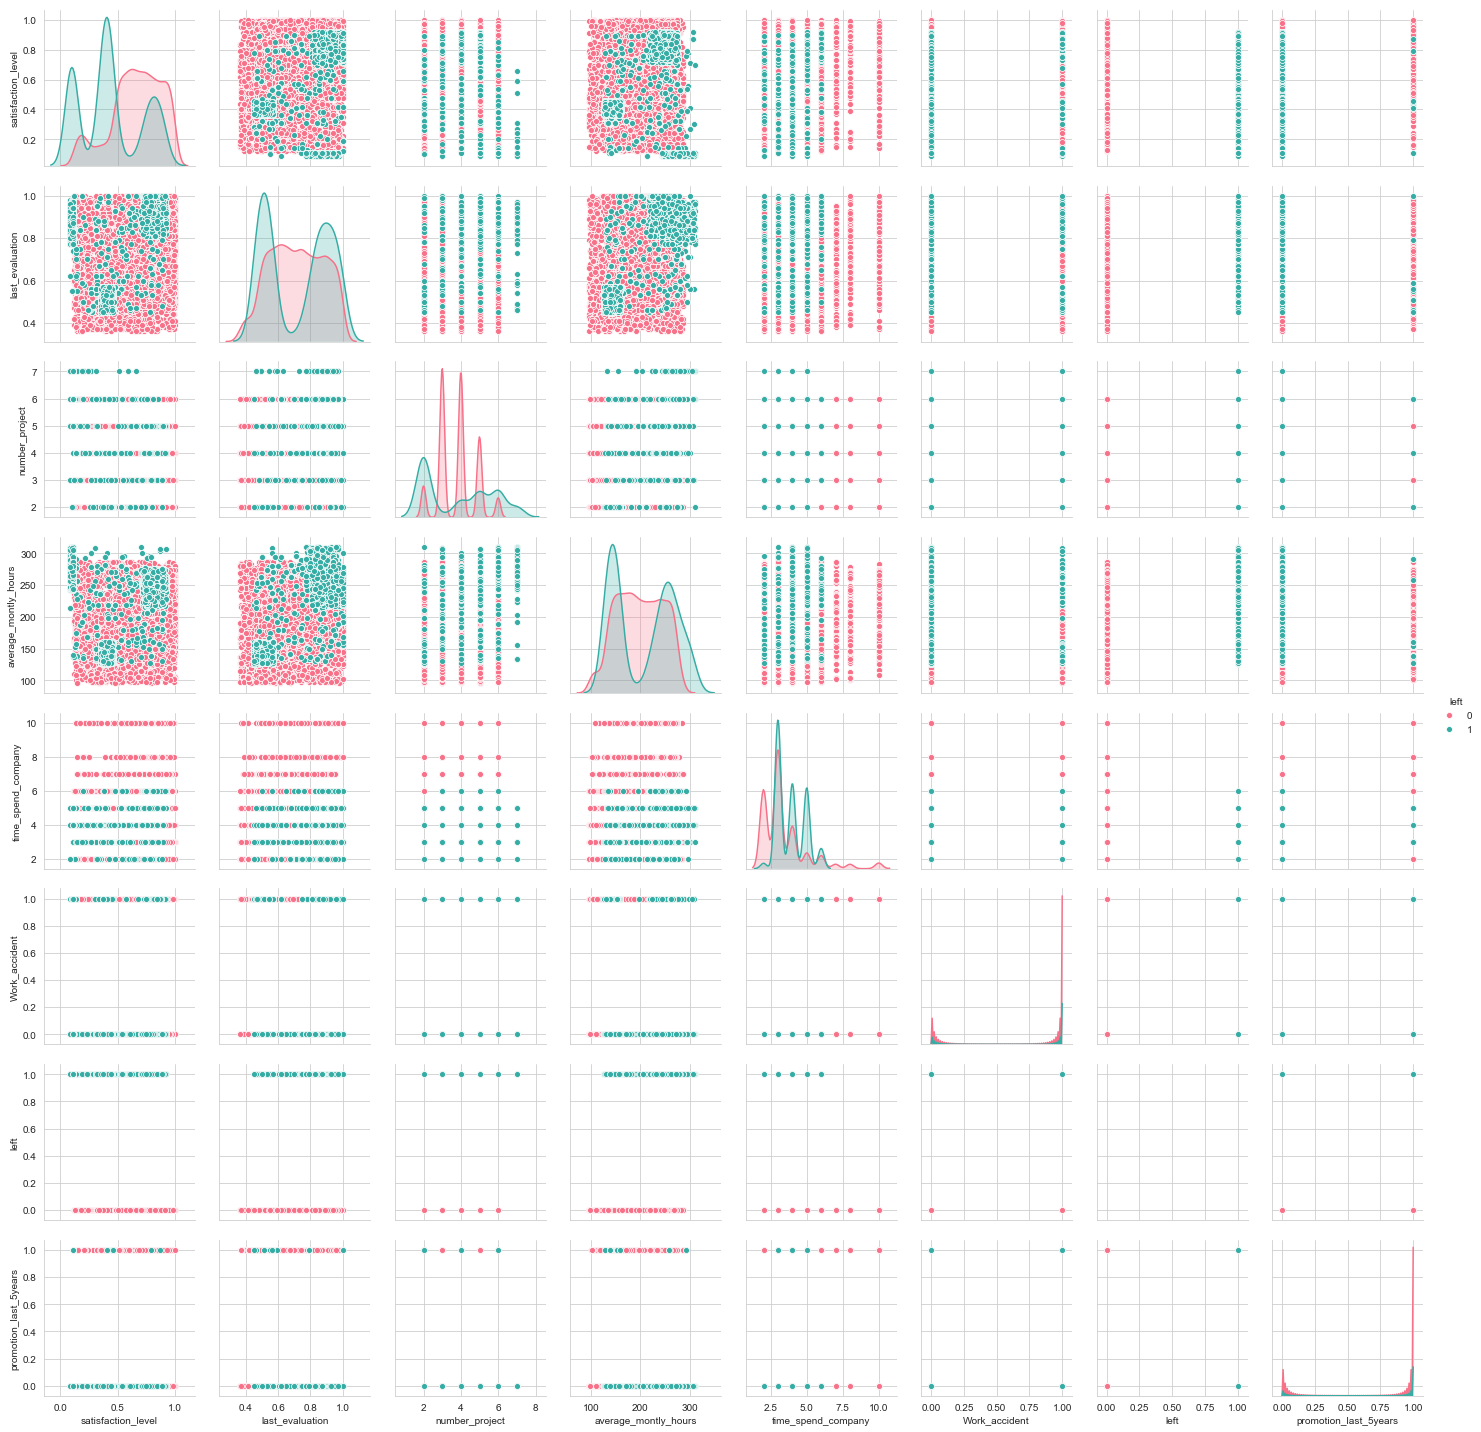

In [81]:
pairplot = sns.pairplot(train_data, hue=KEYS['TARGET'], palette="husl")

### Data Correlation

Now we will analyze correlation in the data for both numerical and categorical columns and plot them

No correlated columns for the  0.7 threshold


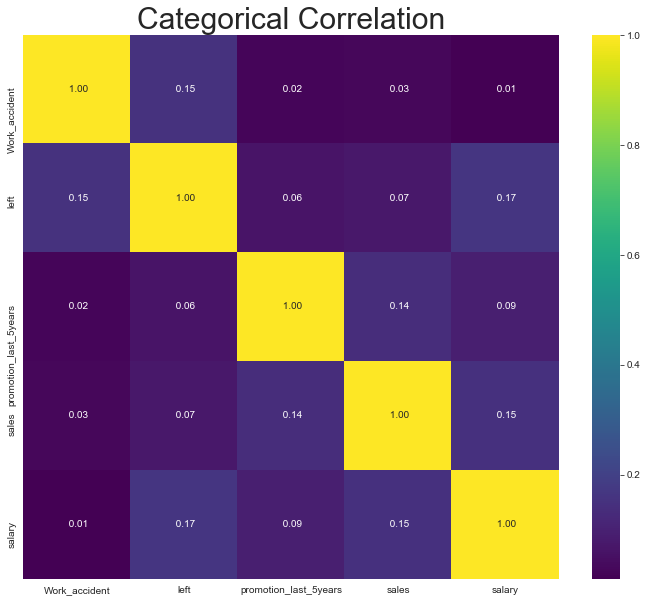

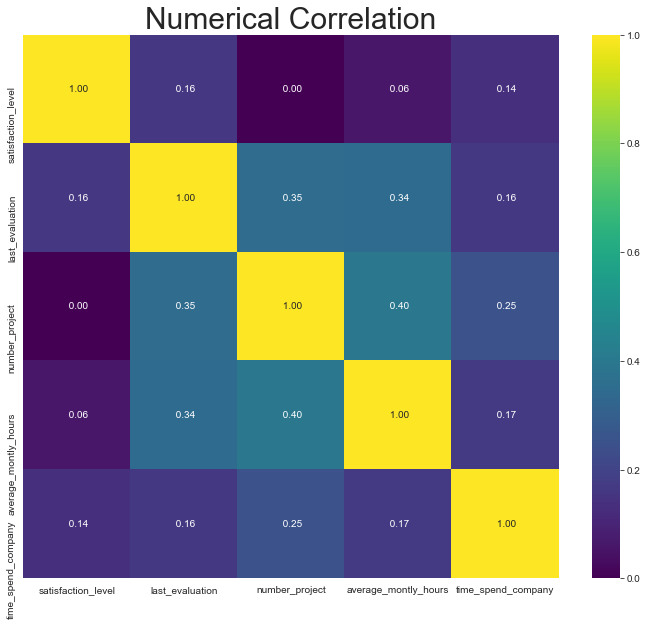

In [82]:
correlated_cols = hp.correlated(train_data, 0.7)

### Underrepresented Features

Now we will remove underrepresented features, meaning those that in 97% of the records have a single value

In [83]:
under_rep = hp.under_represented(train_data, 0.97)

['promotion_last_5years'] underrepresented


## Principal Component Analysis (PCA)

We plot PCA component variance to define the amount we wish to consider in the pipeline

In [24]:
# hp.plot_pca_components(data)

## Feature Importance

Here we plot feature importance using a simple cross-validated random forest in order to have a sense of which features have the most importance

In [28]:
# from sklearn.ensemble import RandomForestClassifier
# hp.feature_importance(data, RandomForestClassifier(n_estimators=KEYS['ESTIMATORS'], random_state = KEYS['SEED']))

## Rebalancing
Now we will rebalance the dataset by performing undersampling based on the target variable

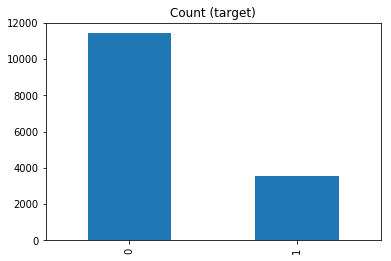

In [25]:
# def target_balance(df):
#     target_count = df[TARGET_VARIABLE].value_counts()
#     target_count.plot(kind='bar', title='Count (target)')
    
# target_balance(data)

In [26]:
# def rebalance(df):
#     count_class_0, count_class_1 = df[TARGET_VARIABLE].value_counts()

#     df_class_0 = df[df[TARGET_VARIABLE] == 0]
#     df_class_1 = df[df[TARGET_VARIABLE] == 1]
#     df_class_0_under = df_class_0.sample(count_class_1)
    
#     return pd.concat([df_class_0_under, df_class_1], axis=0)

### Outlier Removal

Now we will analyze and remove outliers considering two different methods, winsorizing and through Local Outlier Factor

## Feature Creation
Now we will create a feature average time per project, if a person is not in any project we will put -1

## Modeling / Pipeline

The feature engineering pipeline will decide which functions to keep and which not to based on if they improve the score it obtains while cross validating through the different models and transformers

Here we run it with many different models and transformers, as was previously stated, only the best performing ones will be kept

It also uses RandomizedSearchCV for hyperparameter tuning if required

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, PowerTransformer, OneHotEncoder, FunctionTransformer

import importlib
importlib.reload(helper)
hp = helper.Helper(KEYS)

def avg_time_pp(df):
    df = df.copy()
    df['avg_time_per_project'] = (df['average_montly_hours'] * 12 * df['time_spend_company'])/ df['number_project']
    df['avg_time_per_project'] = df['avg_time_per_project'].replace([np.inf, -np.inf], np.nan)
    df['avg_time_per_project'] = df['avg_time_per_project'].fillna(0)
    
    return df

def features(df, cols):
    df = avg_time_pp(df)
        
    return df[df.columns.difference(cols)]

#outliers missing

num_pipeline = Pipeline([ 
    ('power_transformer', PowerTransformer(method='yeo-johnson', standardize = True)),
#     ('binning', KBinsDiscretizer(n_bins = 5, encode = 'onehot-dense')),
#     ('polynomial', PolynomialFeatures(degree = 2, include_bias = False)),
#     ('genetic', SymbolicTransformer(population_size=750, metric='spearman', function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'max', 'min'], parsimony_coefficient = 0.0005, max_samples = 0.9, random_state = KEYS['SEED']))
])

categorical_pipeline = Pipeline([
    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

pipe = Pipeline([
    ('attributes', FunctionTransformer(features, kw_args={'cols': correlated_cols + under_rep}, validate=False)),
    ('column_transformer', ColumnTransformer([
        ('numerical_pipeline', num_pipeline, hp.numericals(data, [KEYS['TARGET']]).columns),
        ('one_hot_pipeline', categorical_pipeline, ['sales', 'salary']),
    ], remainder='passthrough')),
#     ('rfe', RFE(RandomForestRegressor(n_estimators = KEYS['ESTIMATORS'], random_state = KEYS['SEED']), n_features_to_select = 8)),
#     ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators = KEYS['ESTIMATORS'], random_state = KEYS['SEED']), threshold = 0.005)),
#     ('pca', PCA(n_components = 6))
])
# ], memory = KEYS['MEMORY'])

models = [
    {'name':'logistic_regression', 'model': LogisticRegression(solver = 'lbfgs', max_iter = KEYS['ITERATIONS'], random_state = KEYS['SEED'])},
    {'name':'random_forest', 'model': RandomForestClassifier(n_estimators = KEYS['ESTIMATORS'], random_state = KEYS['SEED'])},
    {'name': 'extra_tree', 'model': ExtraTreesClassifier(random_state = KEYS['SEED'])}
]

## Scores

Here you can see all of the scores, first with a baseline (with a simple linear regression) and then throughout the entire cross validation process for each model and each transformer, in certain cases errors do happen (for example when a certain fold contains a sparse matrix), therefore you will see errors marked as such in the score

In [102]:
all_scores = hp.pipeline(train_data, models, pipe, all_scores)

logistic_regression already trained on those parameters, ignoring
random_forest already trained on those parameters, ignoring


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

,Model,CV Score,Time,Steps,Note
0,logistic_regression,0.807 +/- 0.002,0.861395,"attributes, power_transformer, one_hot",
1,random_forest,0.982 +/- 0.002,0.440340,"attributes, power_transformer, one_hot",
2,logistic_regression,0.906 +/- 0.005,1.365013,"attributes, power_transformer, binning, one_hot",
3,random_forest,0.971 +/- 0.002,0.581725,"attributes, power_transformer, binning, one_hot",
4,logistic_regression,0.952 +/- 0.002,9.791823,"attributes, power_transformer, binning, polynomial, one_hot",
5,random_forest,0.968 +/- 0.003,1.622987,"attributes, power_transformer, binning, polynomial, one_hot",
6,logistic_regression,0.854 +/- 0.003,0.996326,"attributes, power_transformer, binning, one_hot, pca",
7,random_forest,0.967 +/- 0.006,0.848574,"attributes, power_transformer, binning, one_hot, pca",
8,extra_tree,0.972 +/- 0.003,0.777775,"attributes, power_transformer, binning, one_hot",
9,extra_tree,0.985 +/- 0.001,0.634383,"attributes, power_transformer, one_hot",


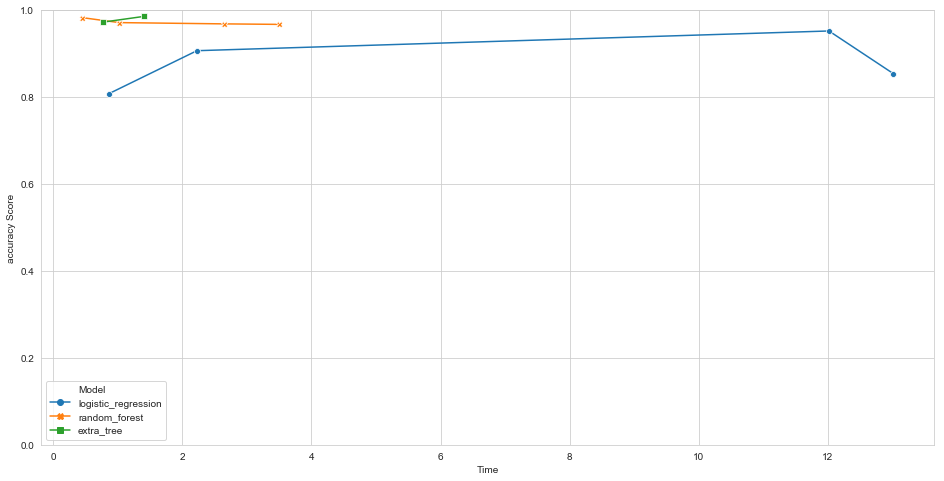

In [103]:
hp.plot_models(all_scores)

## Randomized Grid Search and Final Models Definition

In [124]:
grid = {
    'extra_tree__criterion': ['gini', 'entropy'],
    'extra_tree__min_samples_leaf': [10, 20],
    'extra_tree__min_samples_split': [5, 8],
    'extra_tree__max_leaf_nodes': [30, 60],
}

final_scores, grid_pipe = hp.cv_evaluate(train_data, model = clone(hp.best_pipeline(all_scores)), grid = grid)

## Best Parameters for the Model

In [125]:
print(grid_pipe.best_params_)
final_pipe = grid_pipe.best_estimator_

{'extra_tree__min_samples_split': 8, 'extra_tree__min_samples_leaf': 20, 'extra_tree__max_leaf_nodes': 60, 'extra_tree__criterion': 'gini'}


# Final Score
This is the final score of the model

In [126]:
y, predictions = hp.predict(train_data, holdout, final_pipe)
score = metric_scorer(y, predictions)
score

0.95

# Receiver Operating Characteristic (ROC) / Area Under the Curve 
Now we will plot the ROC

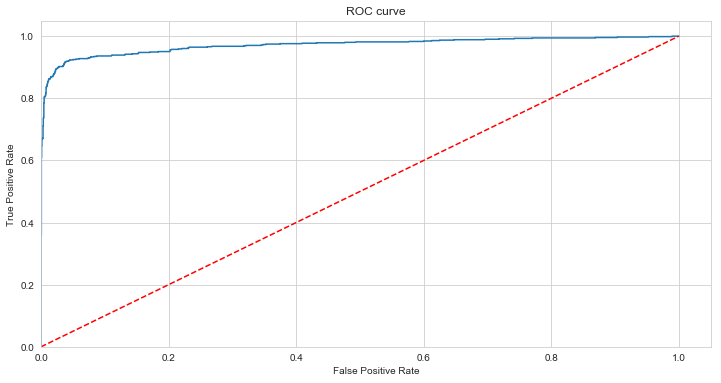

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2294
           1       0.97      0.81      0.88       706

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.96      0.90      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [131]:
hp.roc(holdout, final_pipe, predictions)